In [1]:
import os
import json
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
INDIR = 'data'

In [3]:
game_clean_dir = os.path.join(INDIR, 'reviews_Video_Games_5_processed_1.json')
with open(game_clean_dir, 'r') as f:
    game = json.load(f)

In [4]:
game[0]

{'reviewerID': 'A2HD75EMZR8QLN',
 'asin': '0700099867',
 'reviewerName': '123',
 'helpful': [8, 12],
 'reviewText': 'Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.',
 'overall': 1.0,
 'summary': "Pay to unlock content? I don't think so.",
 'unixReviewTime': 134179

In [5]:
df = pd.DataFrame(game)

In [6]:
df.groupby('overall').count()

reviewerID    asin  reviewerName  helpful  reviewText  summary  \
overall                                                                   
1.0           14853   14853         14592    14853       14853    14853   
2.0           13663   13663         13556    13663       13663    13663   
3.0           28275   28275         28041    28275       28275    28275   
4.0           54804   54804         54351    54804       54804    54804   
5.0          120185  120185        118427   120185      120185   120185   

         unixReviewTime  reviewTime  reviews_clean  
overall                                             
1.0               14853       14853          14853  
2.0               13663       13663          13663  
3.0               28275       28275          28275  
4.0               54804       54804          54804  
5.0              120185      120185         120185

In [7]:
df['reviewerID'].nunique()

24303

In [8]:
df['asin'].nunique()

10672

In [9]:
X = [x['reviews_clean'] for x in game]
y = [y['overall'] for y in game]

Text(0, 0.5, 'Counts')

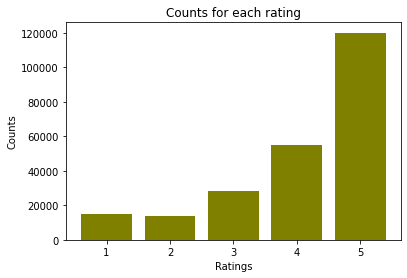

In [10]:
from collections import Counter
Counter(y).keys()
Counter(y).values()
plt.bar(Counter(y).keys(), Counter(y).values(), 
        color='olive')
plt.title('Counts for each rating')
plt.xlabel('Ratings')
plt.ylabel('Counts')

In [11]:
helpful_ratio = []
for x in df['helpful']:
    if x[0] == 0 and x[1] == 0:
        helpful_ratio.append(0)
    else:
        helpful_ratio.append(x[0] / x[1])

In [12]:
sns.kdeplot(helpful_ratio, color='olive')

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Count'>

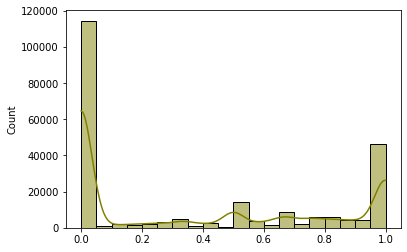

In [13]:
sns.histplot(helpful_ratio, color='olive', bins=20, kde=True)

/home/bobo/Desktop/SQB7002/code/recommender-system/msc_project/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/bobo/Desktop/SQB7002/code/recommender-system/msc_project/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/bobo/Desktop/SQB7002/code/recommender-system/msc_project/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`,

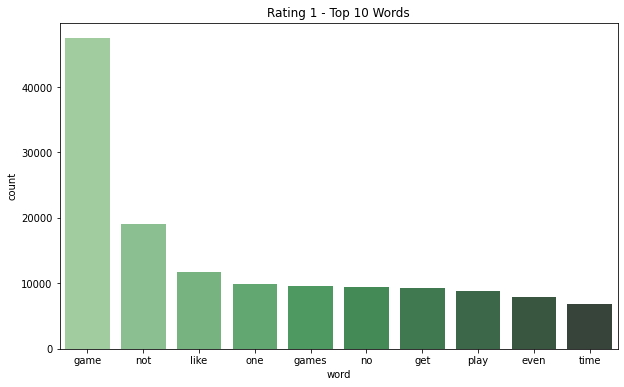

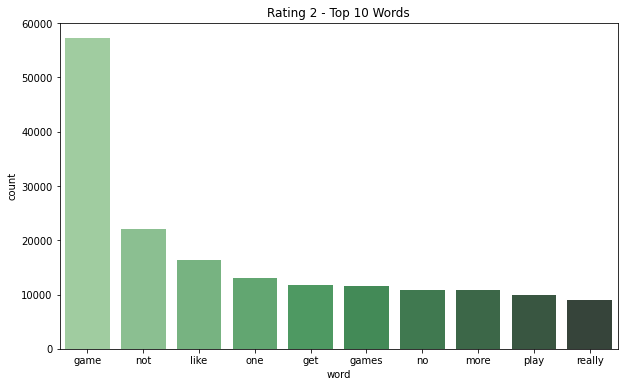

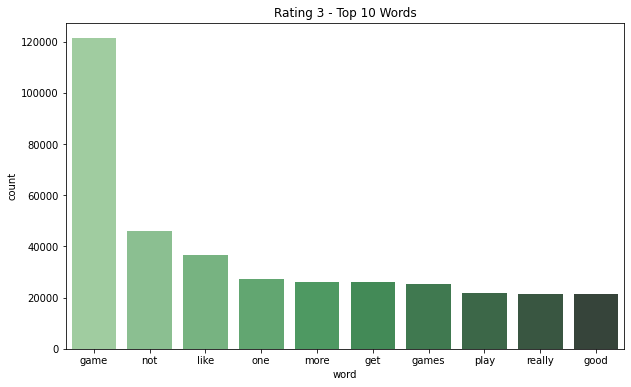

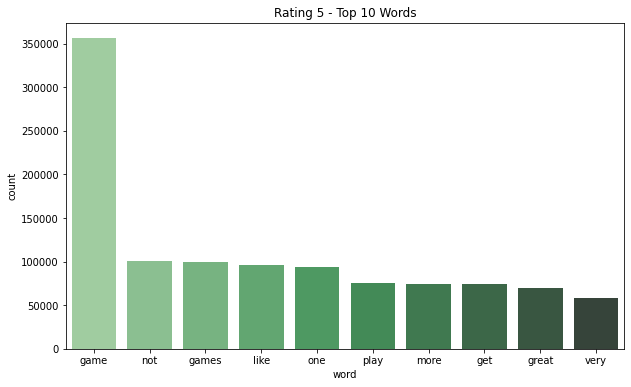

In [61]:
for r in sorted(df['overall'].unique()):
    combined_text = ' '.join(df[df['overall'] == r]['reviews_clean'])
    unique_vocab = combined_text.split()
    word_count = {}
    for element in unique_vocab:
        if element in word_count:
            word_count[element] += 1
        else:
            word_count[element] = 1
    sorted_count = sorted(word_count.items(), key=lambda item: item[1], reverse=True)
    df_freq = pd.DataFrame(sorted_count, columns=['word', 'count'])
    top10 = df_freq.iloc[0:20]
    plt.figure(figsize=(10,6))
    sns.barplot("word", "count", data=top10, palette="Greens_d").set_title("Rating {} - Top 20 Words".format(int(r)))

/home/chrys/mypy/msc/gitlab/recommender-system/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chrys/mypy/msc/gitlab/recommender-system/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chrys/mypy/msc/gitlab/recommender-system/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

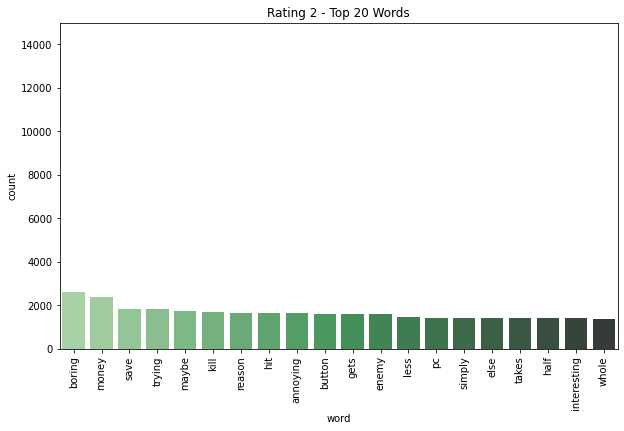

In [25]:
for r in sorted(df['overall'].unique()):
    combined_text = ' '.join(df[df['overall'] == r]['reviews_clean'])
    unique_vocab = combined_text.split()
    word_count = {}
    for element in unique_vocab:
        if element in word_count:
            word_count[element] += 1
        else:
            word_count[element] = 1
    sorted_count = sorted(word_count.items(), key=lambda item: item[1], reverse=True)
    df_freq = pd.DataFrame(sorted_count, columns=['word', 'count'])
    top10 = df_freq.iloc[0:20]
    plt.figure(figsize=(10,6))
    bar = sns.barplot("word", "count", data=top10, palette="Greens_d")
    bar.set_xticklabels(top10['word'],rotation=90)
    bar.set_title("Rating {} - Top 20 Words".format(int(r)))
    bar.set(ylim=(0, 15000))
#     bar.plt.show()

rating:  1.0


rating:  2.0


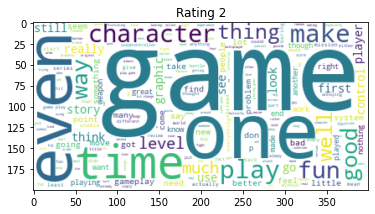

rating:  3.0


rating:  4.0


rating:  5.0


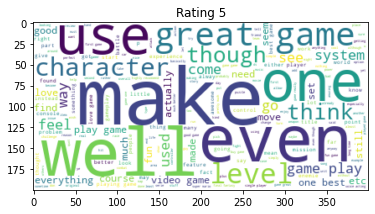

In [35]:
for r in sorted(df['overall'].unique()):
    combined_text = ' '.join(df[df['overall'] == r]['reviews_clean'])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(combined_text)
    # Display the generated image:
    print('rating: ', r)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Rating {}'.format(int(r)))
    plt.show()

### Remove words with high frequency

In [41]:
high_freq_word = ['game', 'one', 'even', 'make', 'play']
new_reviews = []
for review in df['reviews_clean']:
    text = review.split()
    text = [t.lower() for t in text if t.lower() not in high_freq_word]
    text = ' '.join(text)
    new_reviews.append(text)
df['reviews_clean'] = new_reviews

In [42]:
data_clean = df.to_dict('records')
game_clean_dir = os.path.join(INDIR, 'reviews_Video_Games_5_processed_2.json')
with open(game_clean_dir, 'w') as f:
    json.dump(data_clean, f, indent=4)

rating:  1.0


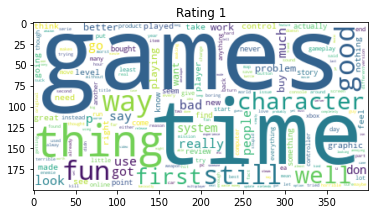

rating:  2.0


rating:  3.0


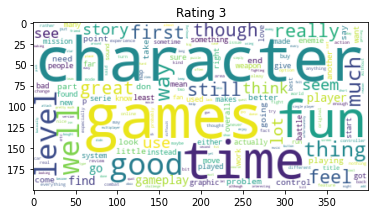

rating:  4.0


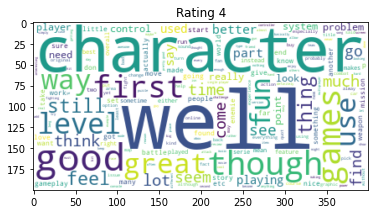

rating:  5.0


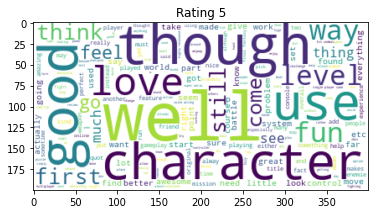

In [43]:
for r in sorted(df['overall'].unique()):
    combined_text = ' '.join(df[df['overall'] == r]['reviews_clean'])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(combined_text)
    # Display the generated image:
    print('rating: ', r)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Rating {}'.format(int(r)))
    plt.show()